In [1]:
# To load the library
import rmf_tool.src.rmf_tool as rmf

# to numerically integrate the ODE
import scipy.integrate as integrate

# To plot the results
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Model

For a given model, the transitions are: 
* $X \mapsto X+1/N$ at rate $1-X^2$
* $X \mapsto X-1/N$ at rate $X$

In [2]:
# This code creates an object that represents a "density dependent population process"
ddpp = rmf.DDPP() 
# We then add the three transitions : 
ddpp.add_transition([1],lambda x:1-x[0]**2)
ddpp.add_transition([-1],lambda x:x[0])

In [3]:
pi=ddpp.fixed_point()
V=ddpp.theoretical_V()
for N in [1,5,10]:
    print(N,pi+V/N)

No initial condition given. We assume that the initial condition is "x0=[1,0,...]"
1 [0.49442719]
5 [0.59331263]
10 [0.60567331]


# Comparison with the ODE

We compare here with the *exact* model (we can compute the exact model because the model is a birth-death process). 

If $P[i]$ denotes the probability of being in state $i$:
* $\frac{d}{dt} P[0] = -P[0]+P[1]*1/N$
* $\frac{d}{dt} P[N] = -P[N]+P[N-1]*(1-((N-1)/N)**2)$
* $\frac{d}{dt} P[i] = -P[i]*(1-(i/N)**2+i/N) + P[i-1]*(1-((i-1)/N)**2) + P[i+1]* (i+1)/N $

In [4]:
def drift(P,N):
    dP = np.zeros(N+1)
    dP[0] = -P[0]+P[1]/N
    dP[N] = -P[N]+P[N-1]*(1-((N-1)/N)**2)
    for i in range(1,N):
        dP[i] = -P[i]*(1-(i/N)**2 + i/N) + P[i-1]*(1- ((i-1)/N)**2) + P[i+1]*(i+1)/N
    return(N*dP)

def exact_value_for_expectation(N,x0=1,time=10,number_of_steps=1000):
    P0 = np.zeros(N+1)
    P0[int(N*x0)]=1
    
    T = np.linspace(0,time,number_of_steps)
    P = integrate.odeint( lambda x,t : drift(x,N), P0, T)
    
    Ep = np.zeros((number_of_steps,1))
    for i in range(number_of_steps):
        Ep[i] = sum( (k*P[i,k]/N for k in range(1,N+1)))
    return(T,Ep)

time to compute drift= 0.020344018936157227


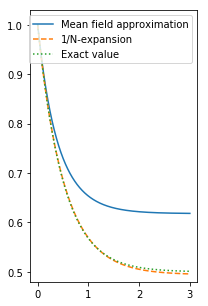

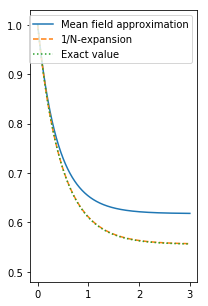

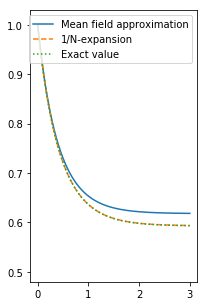

In [5]:
ddpp.set_initial_state([1])
T,X,V,A,XVWABCD = ddpp.meanFieldExpansionTransient(time=3,order=2)

for N in [1,2,5]:
    f = plt.figure()
    f.set_size_inches(3,5)
    plt.plot(T,X)
    plt.plot(T,X+V/N,'--')
    
    Tp,Ep = exact_value_for_expectation(N,x0=1,time=3)
    plt.plot(Tp, Ep,':')
    plt.ylim([.48,1.03])
    plt.legend(('Mean field approximation', '1/N-expansion', 'Exact value'), loc='upper right')
    
    f.savefig('output_pdfs/simpleExample_transient_N{}.pdf'.format(N),bbox_inches='tight')

## Expansion of order $1/N^2$


time to compute drift= 0.010846853256225586


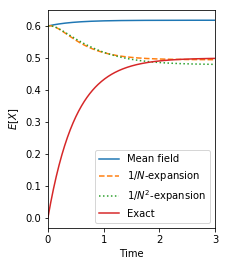

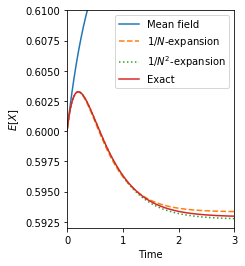

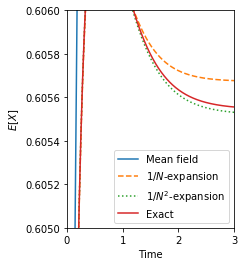

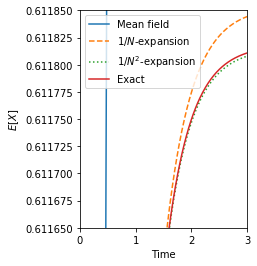

In [6]:
ddpp.set_initial_state([0.6])
T,X,V,A,XVWABCD = ddpp.meanFieldExpansionTransient(time=3,order=2)

f = plt.figure()
    
for N in [1,5,10,20]:
    f=plt.figure()
    plt.clf()
    f.set_size_inches(3,4)
    Tp,Ep = exact_value_for_expectation(N,x0=0.6,time=10)

    plt.plot(T,X)
    plt.plot(T,X+V/N,'--')
    plt.plot(T,X+V/N+A/N**2,':')
    plt.plot(Tp,Ep,'-')
    plt.xlim([0,3])
    plt.legend(('Mean field','$1/N$-expansion','$1/N^2$-expansion','Exact'))
    plt.xlabel('Time')
    plt.ylabel('$E[X]$')
    
    f.savefig('output_pdfs/1D_modelN{}.pdf'.format(N),bbox_inches='tight')
    if N==10:
        plt.ylim([0.605,0.606])
    elif N==5:
        plt.ylim([0.592,0.610])
    elif N==20:
        plt.ylim([0.61165,0.61185])
    f.savefig('output_pdfs/1D_modelN{}_zoom.pdf'.format(N),bbox_inches='tight')
    

time to compute drift= 0.011341094970703125


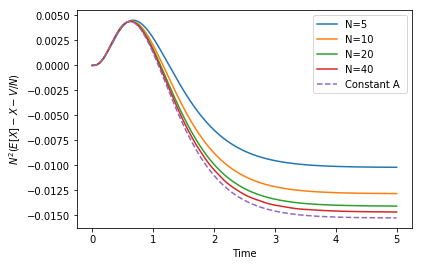

In [7]:
x0 = 0.6
ddpp.set_initial_state([x0])
T,X,V,A,XVWABCD = ddpp.meanFieldExpansionTransient(time=5,order=2)

f = plt.figure()
f.set_size_inches(6,4)
myN = [5,10,20,40]
for N in myN:
    Tp,Ep = exact_value_for_expectation(N,x0=x0,time=5)
    plt.plot(T,N*N*(Ep-X-V/N),'-')
plt.plot(T,A,'--')
legends = ['N={}'.format(N) for N in myN]
legends.append('Constant A ')
plt.xlabel('Time')
plt.ylabel('$N^2(E[X] - X - V/N)$')
plt.legend(legends)
f.savefig('output_pdfs/SIS_constantA.pdf',bbox_inches='tight')

### For Slide

time to compute drift= 0.012381792068481445


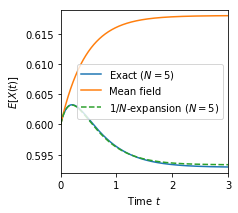

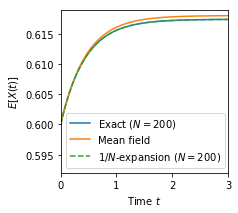

In [8]:
x0 = 0.6
ddpp.set_initial_state([x0])
T,X,V,A,XVWABCD = ddpp.meanFieldExpansionTransient(time=3,order=2)

f = plt.figure()
    
for N in [5,200]:
    f=plt.figure()
    plt.clf()
    f.set_size_inches(3,3)
    Tp,Ep = exact_value_for_expectation(N,x0=x0,time=3)

    plt.plot(Tp,Ep,'-')
    plt.plot(T,X)
    #plt.plot(T,X+V/N+A/N**2,':')
    plt.xlim([0,3])
    #plt.legend(('Mean field','$1/N$-expansion','$1/N^2$-expansion','Exact'))
    plt.legend(('Exact ($N={}$)'.format(N),'Mean field','$1/N$-expansion ($N={}$)'.format(N)))
    plt.xlabel('Time $t$')
    plt.ylabel('$E[X(t)]$')
    f.savefig('output_pdfs/1D_modelN{}_justMF.pdf'.format(N),bbox_inches='tight')
    plt.plot(T,X+V/N,'--')
    plt.legend(('Exact ($N={}$)'.format(N),'Mean field','$1/N$-expansion ($N={}$)'.format(N)))
    f.savefig('output_pdfs/1D_modelN{}_just1_N.pdf'.format(N),bbox_inches='tight')
    plt.ylim([0.592,0.619])
    
    

## Note on the exact resolution of the differential equation

In [9]:
import sympy as sym
sym.init_printing(use_unicode=True)

x,alpha = sym.symbols('x alpha')
g = sym.symbols('g', cls=sym.Function)

In [10]:
diffEq = sym.Eq(g(x).diff(x), 1-g(x)**2-g(x))

In [11]:
G = sym.dsolve(diffEq, g(x))

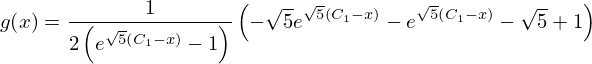

In [12]:
G